In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
iris = pd.read_csv ("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

In [21]:
df = iris.drop(["species"], axis = 1)
df_species = iris["species"]

df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.preprocessing import StandardScaler
#정규화, 표준화 하는 작업
df["sepal_length"] = StandardScaler().fit_transform(df[["sepal_length"]])
df["sepal_width"] = StandardScaler().fit_transform(df[["sepal_width"]])
df["petal_length"] = StandardScaler().fit_transform(df[["petal_length"]])
df["petal_width"] = StandardScaler().fit_transform(df[["petal_width"]])

from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
p_score = pca.fit_transform(df)
print(p_score.shape)
print(pca.explained_variance_ratio_)

(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]


In [11]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
df = pd.DataFrame(data=iris.data, columns=cols)
df["target"]=iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


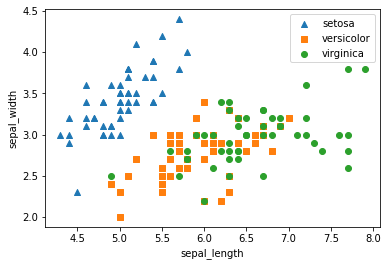

In [13]:
markers = ["^", "s", "o"]
for i, marker in enumerate(markers):
    x_val = df[df["target"] ==i]["sepal_length"]
    y_val = df[df["target"]==i]["sepal_width"]
    plt.scatter(x_val, y_val, marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_scaled = StandardScaler().fit_transform(df)
pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)
print(df_pca.shape)

(150, 2)


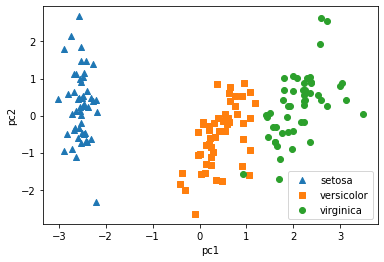

[0.75556687 0.19588013 0.03710796 0.00705965]


In [18]:
cols = ["pc1", "pc2"]
df_pca = pd.DataFrame(data=df_pca, columns=cols)
df_pca["target"] = iris.target

markers = ["^", "s", "o"]
for i, marker in enumerate(markers):
    x_val = df_pca[df_pca["target"] ==i]["pc1"]
    y_val = df_pca[df_pca["target"]==i]["pc2"]
    plt.scatter(x_val, y_val, marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.show()

print(pca.explained_variance_ratio_)

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
df_1 = df.dropna(axis = 0)

print(df_1.isnull().sum().sum())
df_1.shape

0


(183, 12)

In [28]:
print(df["Age"].isnull().sum())
age_mean = df["Age"].mean()
df["Age"].fillna(age_mean, inplace=True)
print(df["Age"].isnull().sum())

177
0


In [29]:
from scipy.stats import mode
print(df["Embarked"].isnull().sum())
embarked_mode = df["Embarked"].mode()

df["Embarked"].fillna(embarked_mode[0], inplace = True)
print(df["Embarked"].isnull().sum())

2
0


In [30]:
df["Embarked"].fillna(method = 'ffill', inplace = True)

In [31]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

print(df.groupby("Sex")['Age'].mean())
print(df.groupby('Pclass')['Age'].mean())

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [32]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [33]:
df["Age"].fillna(df.groupby("Pclass")["Age"].transform('mean'), inplace = True)

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00000,0,0,370376,7.75,NaN,Q


In [34]:
data = 10 * np.random.randn(200) + 50
df = pd.DataFrame({"값":data})

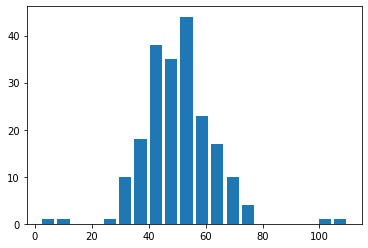

In [35]:
df.loc[201] = 2
df.loc[202] = 100
df.loc[203] = 10
df.loc[204] = 110

plt.hist(df["값"], bins = 20, rwidth = 0.8)
plt.show()

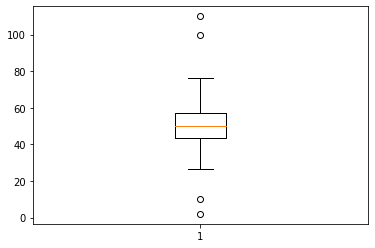

In [36]:
plt.boxplot(df["값"])
plt.show()

In [37]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [38]:
df = pd.read_csv ("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

In [39]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [40]:
df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2}, inplace = True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [41]:
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [42]:
print(X_train.shape)

(120, 4)


In [43]:
dt = DecisionTreeClassifier(random_state = 11)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [44]:
pred = dt.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)

0.9333333333333333


In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  9]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report
rpt = classification_report(y_test, pred)
print(rpt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [48]:
# accuracy 정확도 정확한지 판단하는 자료
# precision positive 예측중 실제로 positive일치하는 비율
# recall 실제 positive 중 예측이 일치하는 비율

In [49]:
df  = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
d_mean = df["Age"].mean()
df["Age"].fillna(d_mean, inplace =True)

d_mode = df["Embarked"].mode()[0]
df["Embarked"].fillna(d_mode, inplace = True)

In [52]:
from sklearn.preprocessing import LabelEncoder
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])

df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])

In [53]:
df["Familysize"] = df["SibSp"]+df["Parch"]

In [54]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,2,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,0,0


In [56]:
X = df[["Pclass", "Sex", "Age", "Fare", "Embarked", "Familysize"]]
y = df["Survived"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 11)

In [59]:
dt = DecisionTreeClassifier(random_state = 11)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [60]:
pred = dt.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)

0.7877094972067039


In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [93]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

In [94]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaler = scaler.fit_transform(df.iloc[:,:-1])  #범위를 정해서 설정하면 여러번 안해도 된다

In [77]:
df[["sepal_length"]] = scaler.fit_transform(df[["sepal_length"]])
df[["sepal_width"]] = scaler.fit_transform(df[["sepal_width"]])
df[["petal_length"]] = scaler.fit_transform(df[["petal_length"]])
df[["petal_width"]] = scaler.fit_transform(df[["petal_width"]])

In [ ]:
# df의 1에서 4열까지만 정규화 하는법
# 

In [99]:
df_species = df["species"]

In [98]:
df_scaler = pd.DataFrame(df_scaler)
df_scaler

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [103]:
df_scaler.set_axis(["sepal_length", "sepal_width", "petal_length", "petal_width", "species"], axis = "columns")
df_scaler

,0,1,2,3,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,virginica
146,0.555556,0.208333,0.677966,0.750000,virginica
147,0.611111,0.416667,0.711864,0.791667,virginica
148,0.527778,0.583333,0.745763,0.916667,virginica


In [ ]:
[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

In [105]:
df_scaler.rename({0:"sepal_length", 1:"sepal_width", 2:"petal_length", 3:"petal_width", "species":"species"}, axis = "columns")

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,virginica
146,0.555556,0.208333,0.677966,0.750000,virginica
147,0.611111,0.416667,0.711864,0.791667,virginica
148,0.527778,0.583333,0.745763,0.916667,virginica


In [107]:
# rename은 바꿔준다 
# set_axis는 inplace = True로 바꿔야 한다